<a href="https://colab.research.google.com/github/Lianasy/Machine-Lerning-labs/blob/main/lab1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.5, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.weights = 0
        self.bias = 0

    def fit(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        n_samples, n_features = x.shape
        self.weights = np.random.rand(n_features)

        prev_loss = float('inf')

        # Gradient descent for updating weights and bias
        for i in range(self.n_iterations):
            y_predicted = np.dot(x, self.weights)
            # Computing gradients
            dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # Updating weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Calculating current loss
            loss = np.mean((y_predicted - y) ** 2)
            # Printing current weights and loss function values
            if i % 60 == 0:
                print(f"Epoch {i}, Weights: {self.weights}, Loss: {loss}")

            # Check if change in loss is smaller than tolerance
            if abs(prev_loss - loss) < self.tolerance:
                print(f"Converged at epoch {i}. Loss: {loss}")
                break
            prev_loss = loss  # Update previous loss for the next iteration

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.dot(X, self.weights)


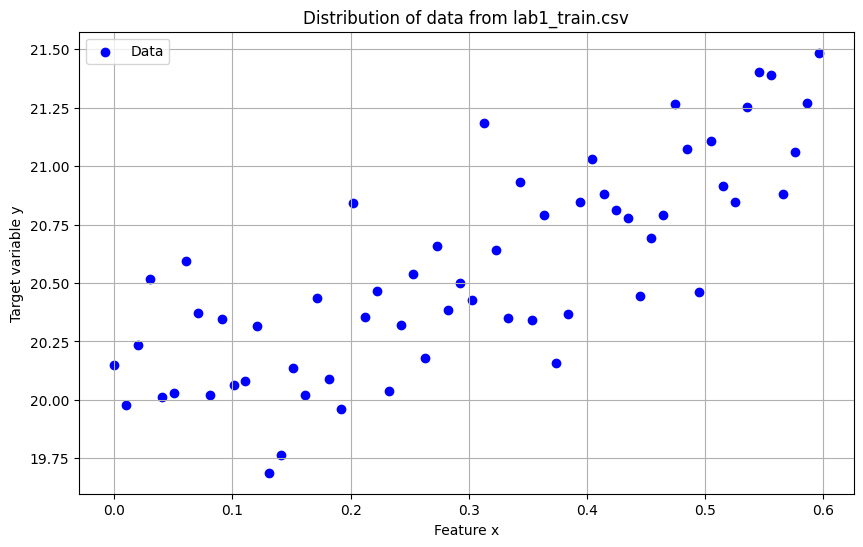

In [ ]:
# Load data from train and test datasets
train_data = np.loadtxt("lab_1_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("lab_1_test.csv", delimiter=",", skiprows=1)

# Split data into features (X) and target variable (y)
X_train = train_data[:, 1:2]
y_train = train_data[:, 2]
X_test = test_data[:, 1:2]
y_test = test_data[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.title('Distribution of data from lab1_train.csv')
plt.xlabel('Feature x')
plt.ylabel('Target variable y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the training data
y_pred_train = model.predict(X_train)
# Predict for the test data
y_pred = model.predict(X_test)

Epoch 0, Weights: [10.70390384  3.3199718 ], Loss: 378.6303049621825
Epoch 60, Weights: [19.45795194  3.61613893], Loss: 0.15762647285872525
Epoch 120, Weights: [19.74475697  2.68062831], Loss: 0.08857758892432985
Epoch 180, Weights: [19.86769448  2.2796265 ], Loss: 0.07589079485312072
Epoch 240, Weights: [19.920391    2.10773913], Loss: 0.0735597688519156
Epoch 300, Weights: [19.9429791  2.0340605], Loss: 0.07313147450207473


In [ ]:
# Calculating model performance metrics (mean squared error)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07386697945328452


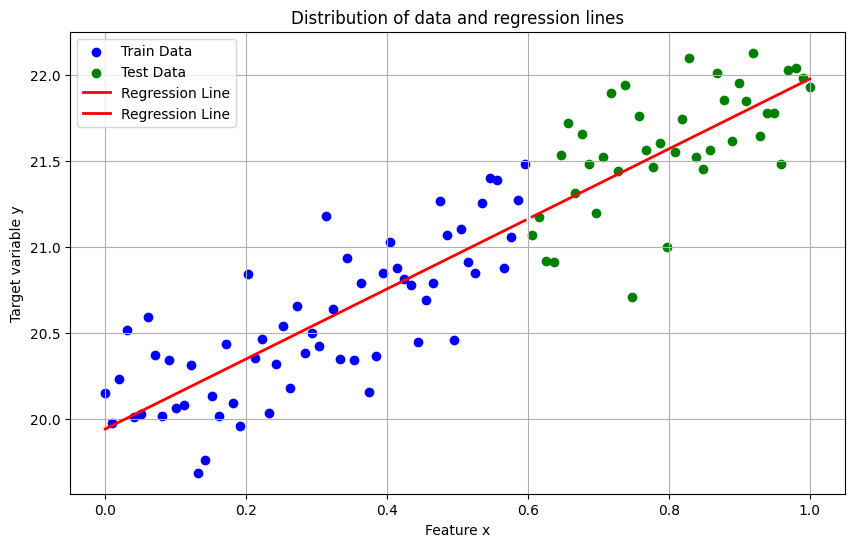

In [ ]:
plt.figure(figsize=(10, 6))
# Data from lab1_train.csv
plt.scatter(X_train, y_train, color='blue', label='Train Data')
# Data from lab1_test.csv
plt.scatter(X_test, y_test, color='green', label='Test Data')
# Regression line
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression Line')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Distribution of data and regression lines')
plt.xlabel('Feature x')
plt.ylabel('Target variable y')
plt.legend()
plt.grid(True)
plt.show()